In [1]:
# Install libraries
%pip install seaborn
%pip install squarify

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify

In [3]:
# Read the dataset
df = pd.read_csv(r'Superstore Sales.csv')

In [4]:
# Learn dataset
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [6]:
# Convert date columns to date format from object
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%d/%m/%Y')

In [7]:
# Create 'Order Year' column based on Order Date
df['Order Year'] = df['Order Date'].dt.year

### 1. Total sales by year


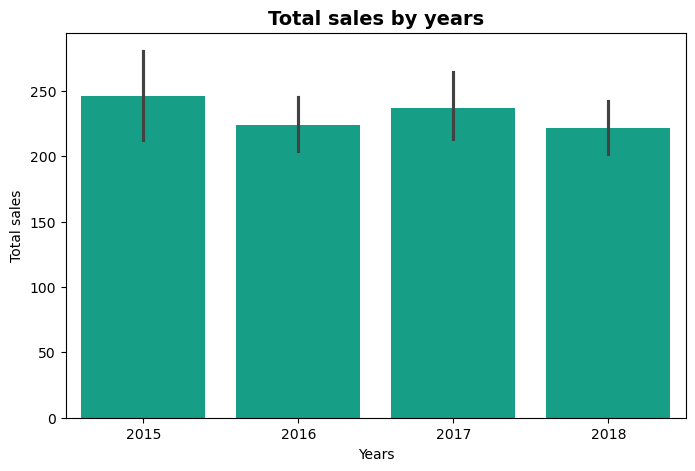

In [59]:
# Total sales by year
plt.figure(figsize = (8,5))

sns.barplot( data = df, x = 'Order Year', y = 'Sales', color = '#00B496')
plt.title('Total sales by years', fontsize = 14, fontweight = 'bold')
plt.xlabel('Years')
plt.ylabel('Total sales')

plt.show()

### 2. Total sales by Segments, Regions and Categories

In [9]:
# Organize data
sales_segments = df.groupby('Segment')['Sales'].sum()
sales_regions =  df.groupby('Region')['Sales'].sum()
sales_categories =  df.groupby('Category')['Sales'].sum()

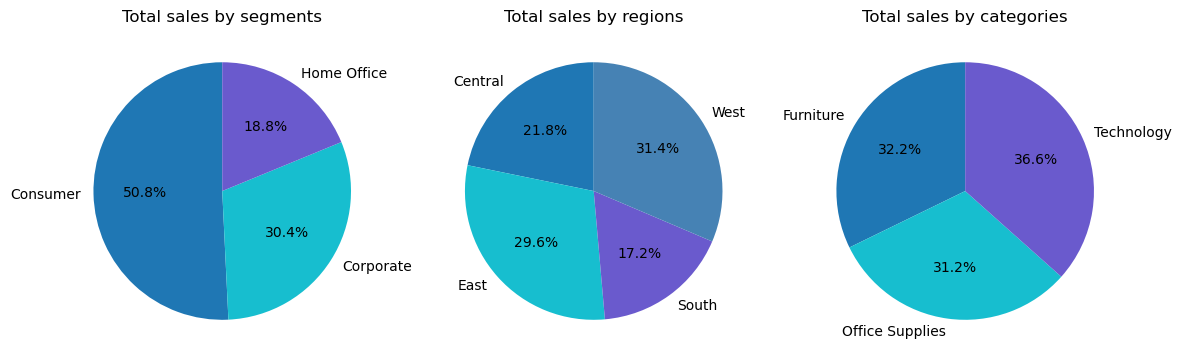

In [56]:
# Visualize as pie-charts
fig,axes = plt.subplots(1,3, figsize = (12,8))

axes[0].pie(sales_segments, labels= sales_segments.index, autopct = '%1.1f%%', startangle = 90, colors = ['#1F77B4', '#17BECF', '#6A5ACD'])
axes[0].set_title('Total sales by segments')

axes[1].pie(sales_regions, labels = sales_regions.index, autopct = '%1.1f%%', startangle = 90, colors = ['#1F77B4', '#17BECF', '#6A5ACD', '#4682B4'])
axes[1].set_title('Total sales by regions')

axes[2].pie(sales_categories, labels = sales_categories.index, autopct = '%1.1f%%', startangle = 90, colors = ['#1F77B4', '#17BECF', '#6A5ACD'])
axes[2].set_title('Total sales by categories')

plt.tight_layout()
plt.show()

### 3. Total sales by products

In [11]:
# Organize data for products and sales
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum().sort_values( ascending=False)
sizes = subcategory_sales.values
labels = subcategory_sales.index
total=sizes.sum()

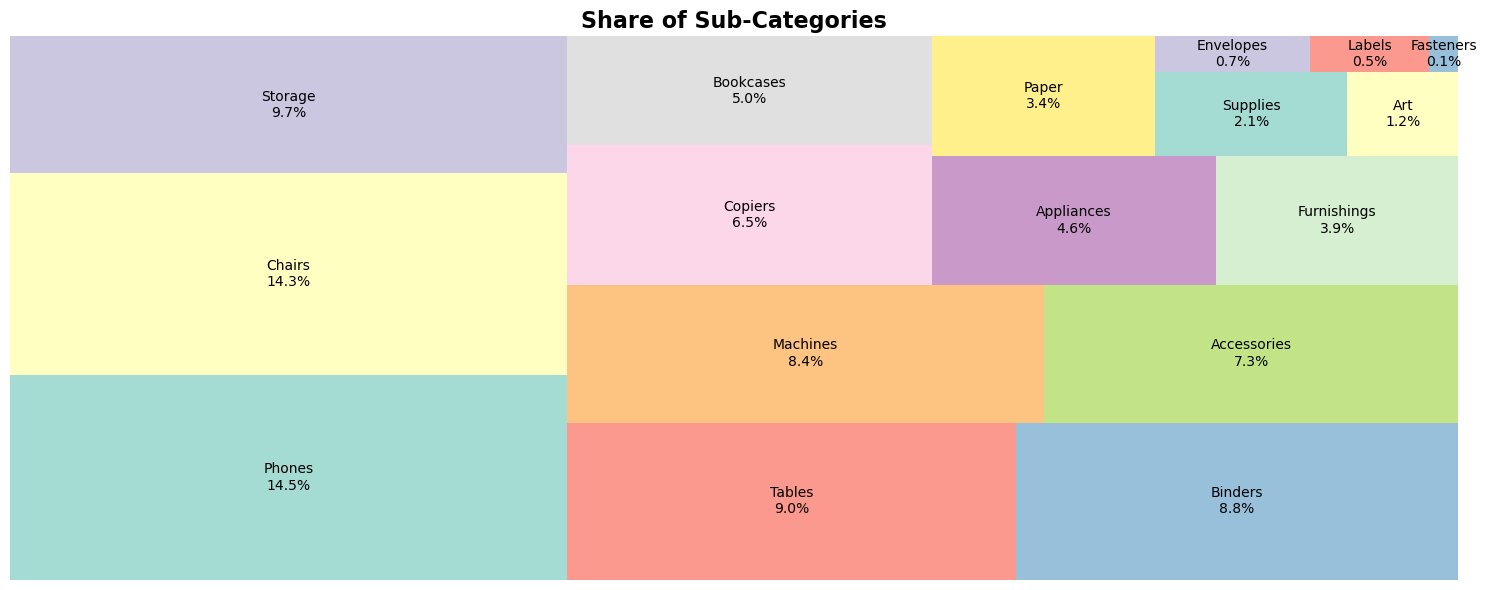

In [61]:
plt.figure(figsize = (15,6))

labels_with_pct = [f"{label}\n{value/total*100:.1f}%" for label, value in zip(labels, sizes)]

squarify.plot(sizes = sizes, label=labels_with_pct, color=plt.cm.Set3.colors, alpha=0.8)

plt.title('Share of Sub-Categories', fontsize = 16, fontweight = 'bold')
plt.axis('off')
plt.tight_layout()
plt.show()

### 4. Total sales trend over time

In [13]:
# Organize your data in date(months, years)
sales_over_time = df.loc[0:,['Order Date', 'Sales']]
df['Month-Year'] = df['Order Date'].dt.strftime('%m-%y')

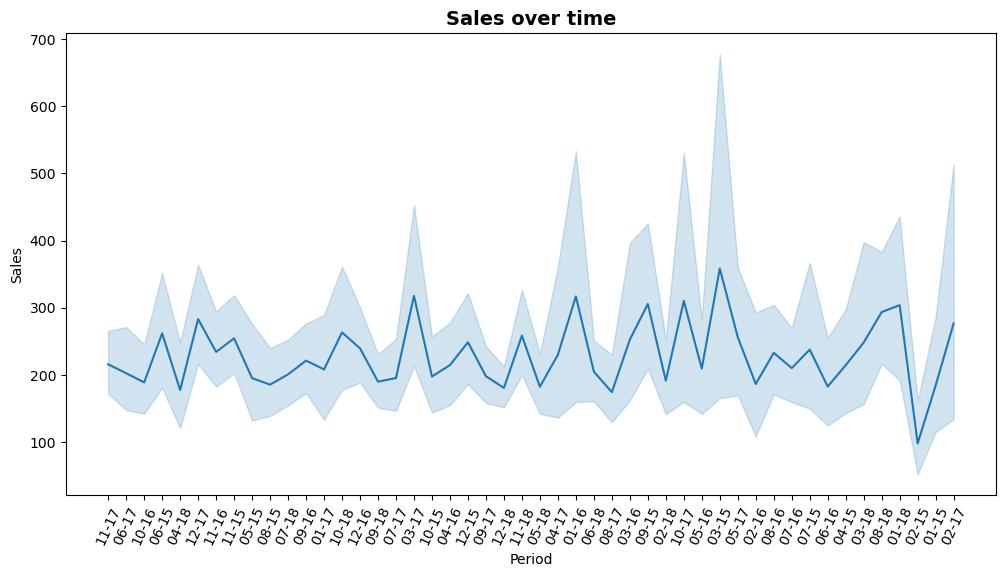

In [62]:
plt.figure(figsize = (12,6))

sns.lineplot(data = df, x='Month-Year', y = 'Sales')
plt.title('Sales over time', fontsize = 14, fontweight = 'bold')
plt.xlabel('Period')

plt.xticks(rotation=65)
plt.tight_layout
plt.show()

### 5. Average revenue per order

In [43]:
# Organize data
arpo = df.groupby('Sub-Category').agg(Total_Sales = ('Sales', 'sum'), Order_Count = ('Order ID', 'count'))
arpo ['Total_Sales'] = arpo['Total_Sales'].astype(int)
arpo['ARO'] = arpo['Total_Sales']/arpo['Order_Count']
arpo['ARO'] = arpo['ARO'].astype(int)
arpo = arpo.sort_values(by = 'ARO', ascending = False)

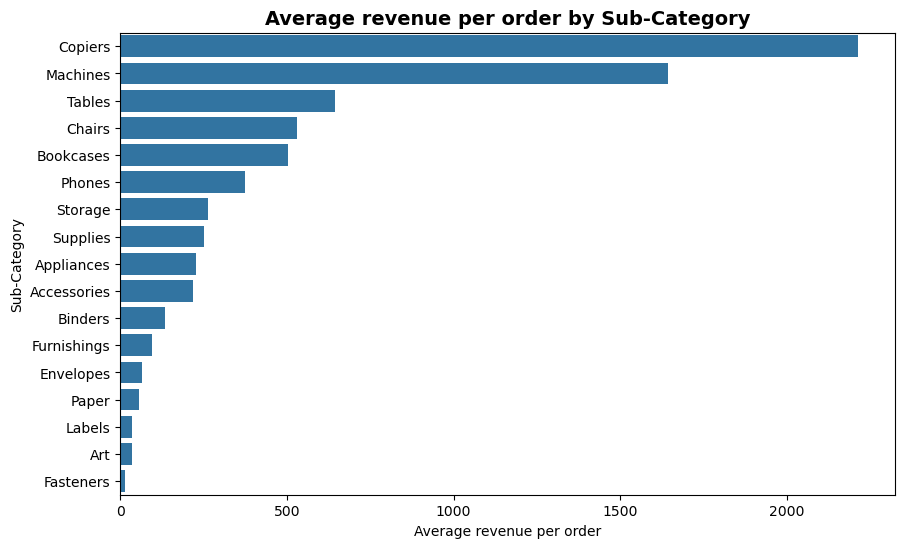

In [63]:
plt.figure(figsize = (10,6))

sns.barplot(x = arpo['ARO'], y = arpo.index)
plt.title('Average revenue per order by Sub-Category', fontsize = 14, fontweight = 'bold')
plt.xlabel('Average revenue per order')
plt.ylabel('Sub-Category')

plt.show()